In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pylab import rcParams

haarcascade = "haarcascade_frontalface_alt2.xml"
detector = cv2.CascadeClassifier(haarcascade)

def show(i):
    plt.imshow(i, cmap='gray', vmin=0, vmax=255)

In [106]:
image = cv2.imread("photo.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

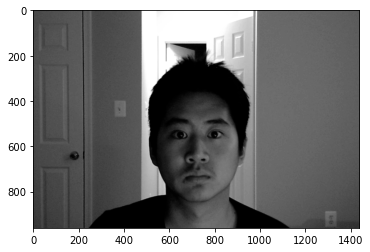

In [3]:
show(image)

In [70]:
faces = detector.detectMultiScale3(image, 1.1, 3, 0, (0,0), (1000, 1000), True)
print("Faces:\n", faces)

Faces:
 (array([[516, 397, 427, 427]], dtype=int32), array([20], dtype=int32), array([56.28460653]))


In [107]:
for idx in range(len(faces)):
    (x, y, w, d) = faces[0][idx]
    cv2.rectangle(image, (x, y), (x+w, y+d), (255, 255, 255), 5)
    cv2.putText(image, f"{faces[2][idx] / 100:.2%}", (x, y),cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 3, 2)
    break

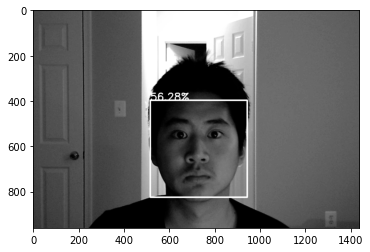

In [108]:
show(image)

In [109]:
LBFmodel = "lbfmodel.yml"
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

loading data from : lbfmodel.yml


In [111]:
_, landmarks = landmark_detector.fit(image, faces[0])

In [112]:
landmarks[0][0].shape

(68, 2)

In [118]:
for landmark in landmarks:
    for x,y in landmark[0]:
        cv2.circle(image, (int(x), int(y)), 1, (255, 255, 255), 3)

    print(landmark[0][33])
    cv2.circle(image, (int(landmark[0][30][0]), int(landmark[0][30][1])), 2, (255, 255, 255), 5)

[725.05927 680.3105 ]


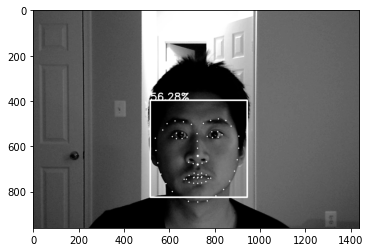

In [119]:
show(image)